# 2018-03-14-HLV2MBGX5

GenPhen RNAseq Validatation.

Diploid RHA strains constructed and sequencing with Lexogen QuantSeq. Pipeline [here](../../genphen/validation/rnaseq/Snakefile)

|Sample|Strain|RNABatch|
|:-:|:-:|:-:|
|1A|S_|1|
|1B|S_|1|
|1C|S_|2|
|2A|Y_|1|
|2B|Y_|1|
|2C|Y_|2|
|3A|S_xYJM789|1|
|3B|S_xYJM789|1|
|3C|S_xYJM789|2|
|4A|S∆Bul2_xYJM789|1|
|4B|S∆Bul2_xYJM789|2|
|4C|S∆Bul2_xYJM789|2|
|5A|S_xYJM789∆Bul2|1|
|5B|S_xYJM789∆Bul2|2|
|5C|S_xYJM789∆Bul2|2|
|6A|S∆Bul2_xYJM789∆Bul2|1|
|6B|S∆Bul2_xYJM789∆Bul2|2|
|6C|S∆Bul2_xYJM789∆Bul2|2|

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle code on/off."></form>

In [18]:
suppressMessages({
    .libPaths(c(
                "/g/steinmetz/brooks/anaconda/envs/genphen/lib/R/library"))
               #"/g/steinmetz/brooks/anaconda/lib/R/library"))
               #"/root/anaconda3/envs/jupyter/lib/R/library"))
    # config opts and libraries
    .libPaths = .libPaths()[1]
    options(repr.plot.width = 6)
    options(repr.plot.height = 5)
    options(jupyter.plot_mimetypes = 'image/png')
    devtools::source_url("https://raw.githubusercontent.com/scalefreegan/steinmetz-lab/master/yeast2_0/scripts/seqtools.R")
    library(wasabi)
    library(sleuth)
    library(pheatmap)
    library(forcats)
    library(qtl)
    library(readr)
    library(dplyr)
    library(tidyr)
    library(ggthemes)
})

In [17]:
sample2ezname = function(x) {
    o = x
    o[x == "1A"] = "S_S"
    o[x == "1B"] = "S_S"
    o[x == "1C"] = "S_S" #bad should ignore (no reads)
    o[x == "2A"] = "Y_Y"
    o[x == "2B"] = "Y_Y"
    o[x == "2C"] = "Y_Y"
    o[x == "3A"] = "S_Y"
    o[x == "3B"] = "S_Y"
    o[x == "3C"] = "S_Y"
    o[x == "4A"] = "SDBUL2_Y"
    o[x == "4B"] = "SDBUL2_Y"
    o[x == "4C"] = "SDBUL2_Y"
    o[x == "5A"] = "S_YDBUL2"
    o[x == "5B"] = "S_YDBUL2"
    o[x == "5C"] = "S_YDBUL2"
    o[x == "6A"] = "SDBUL2_YDBUL2"
    o[x == "6B"] = "SDBUL2_YDBUL2"
    o[x == "6C"] = "SDBUL2_YDBUL2"
    return(o)
}

gff_cols = c("seqid","source","type","start","end","score","strand","phase","attributes")
gff_s = read_tsv("/g/steinmetz/brooks/genphen/validation/rnaseq/transcriptome/s288c/gff/s288c_wERCC_gene.gff",
                 col_names = gff_cols)
gff_y = read_tsv("/g/steinmetz/brooks/genphen/validation/rnaseq/transcriptome/yjm789/gff/YJM789_AAFW02000000_wERCC_gene.gff",
                 col_names = gff_cols)
gff = bind_rows(gff_s,gff_y) %>% distinct()


RESULTS = "/g/steinmetz/brooks/genphen/validation/rnaseq/results/salmon/"
S1A = read_tsv(file.path(RESULTS, "Sample1A/quant.sf"), col_names = T) %>% 
    mutate(sample = "1A")
S1B = read_tsv(file.path(RESULTS, "Sample1B/quant.sf"), col_names = T) %>% 
    mutate(sample = "1B")
# S1C = read_tsv(file.path(RESULTS, "Sample1C/quant.sf"), col_names = T) %>% 
#     mutate(sample = "1C")
S2A = read_tsv(file.path(RESULTS, "Sample2A/quant.sf"), col_names = T) %>% 
    mutate(sample = "2A")
S2B = read_tsv(file.path(RESULTS, "Sample2B/quant.sf"), col_names = T) %>% 
    mutate(sample = "2B")
S2C = read_tsv(file.path(RESULTS, "Sample2C/quant.sf"), col_names = T) %>% 
    mutate(sample = "2C")
S3A = read_tsv(file.path(RESULTS, "Sample3A/quant.sf"), col_names = T) %>% 
    mutate(sample = "3A")
S3B = read_tsv(file.path(RESULTS, "Sample3B/quant.sf"), col_names = T) %>% 
    mutate(sample = "3B")
S3C = read_tsv(file.path(RESULTS, "Sample3C/quant.sf"), col_names = T) %>% 
    mutate(sample = "3C")
S4A = read_tsv(file.path(RESULTS, "Sample4A/quant.sf"), col_names = T) %>% 
    mutate(sample = "4A")
S4B = read_tsv(file.path(RESULTS, "Sample4B/quant.sf"), col_names = T) %>% 
    mutate(sample = "4B")
S4C = read_tsv(file.path(RESULTS, "Sample4C/quant.sf"), col_names = T) %>% 
    mutate(sample = "4C")
S5A = read_tsv(file.path(RESULTS, "Sample5A/quant.sf"), col_names = T) %>% 
    mutate(sample = "5A")
S5B = read_tsv(file.path(RESULTS, "Sample5B/quant.sf"), col_names = T) %>% 
    mutate(sample = "5B")
S5C = read_tsv(file.path(RESULTS, "Sample5C/quant.sf"), col_names = T) %>% 
    mutate(sample = "5C")
S6A = read_tsv(file.path(RESULTS, "Sample6A/quant.sf"), col_names = T) %>% 
    mutate(sample = "6A")
S6B = read_tsv(file.path(RESULTS, "Sample6B/quant.sf"), col_names = T) %>% 
    mutate(sample = "6B")
S6C = read_tsv(file.path(RESULTS, "Sample6C/quant.sf"), col_names = T) %>% 
    mutate(sample = "6C")
results = bind_rows(S1A, S1B, 
                    S2A, S2B, S2C,
                    S3A, S3B, S3C,
                    S4A, S4B, S4C,
                    S5A, S5B, S5C,
                    S6A, S6B, S6C,
                   )

results = results %>% mutate(strain = sample2ezname(sample), Name = substr(Name,1,nchar(Name)-3)) %>%
          separate(sample, into=c("sample","replicate"), sep=1)

name2attr <- function(gff) {
    x = mclapply(gff$attributes, function(i) strsplit(i,";")[[1]][1])
    x = gsub("ID=","",x)
    x = gsub('gene_id "',"",x)
    x = gsub('"',"",x)
    o = gff$attributes
    names(o) = x
    return(o)
}
n2a = name2attr(gff)

results = results %>% mutate(attributes = n2a[Name])

Parsed with column specification:
cols(
  seqid = col_character(),
  source = col_character(),
  type = col_character(),
  start = col_integer(),
  end = col_integer(),
  score = col_character(),
  strand = col_character(),
  phase = col_character(),
  attributes = col_character()
)
Parsed with column specification:
cols(
  seqid = col_character(),
  source = col_character(),
  type = col_character(),
  start = col_integer(),
  end = col_integer(),
  score = col_character(),
  strand = col_character(),
  phase = col_character(),
  attributes = col_character()
)
Parsed with column specification:
cols(
  Name = col_character(),
  Length = col_integer(),
  EffectiveLength = col_double(),
  TPM = col_double(),
  NumReads = col_double()
)
Parsed with column specification:
cols(
  Name = col_character(),
  Length = col_integer(),
  EffectiveLength = col_double(),
  TPM = col_double(),
  NumReads = col_double()
)
Parsed with column specification:
cols(
  Name = col_character(),
  Length = col

# Reproducibility across experiments

Decent reproducibility across samples

In [26]:
aggresults = acast(results %>% filter(!grepl("^ERCC",Name)), formula = Name ~ sample + replicate, value.var = "TPM", fun.aggregate = median) 
aggresults = log2(aggresults + 1)
#colnames(aggresults) = sample2ezname(colnames(aggresults))

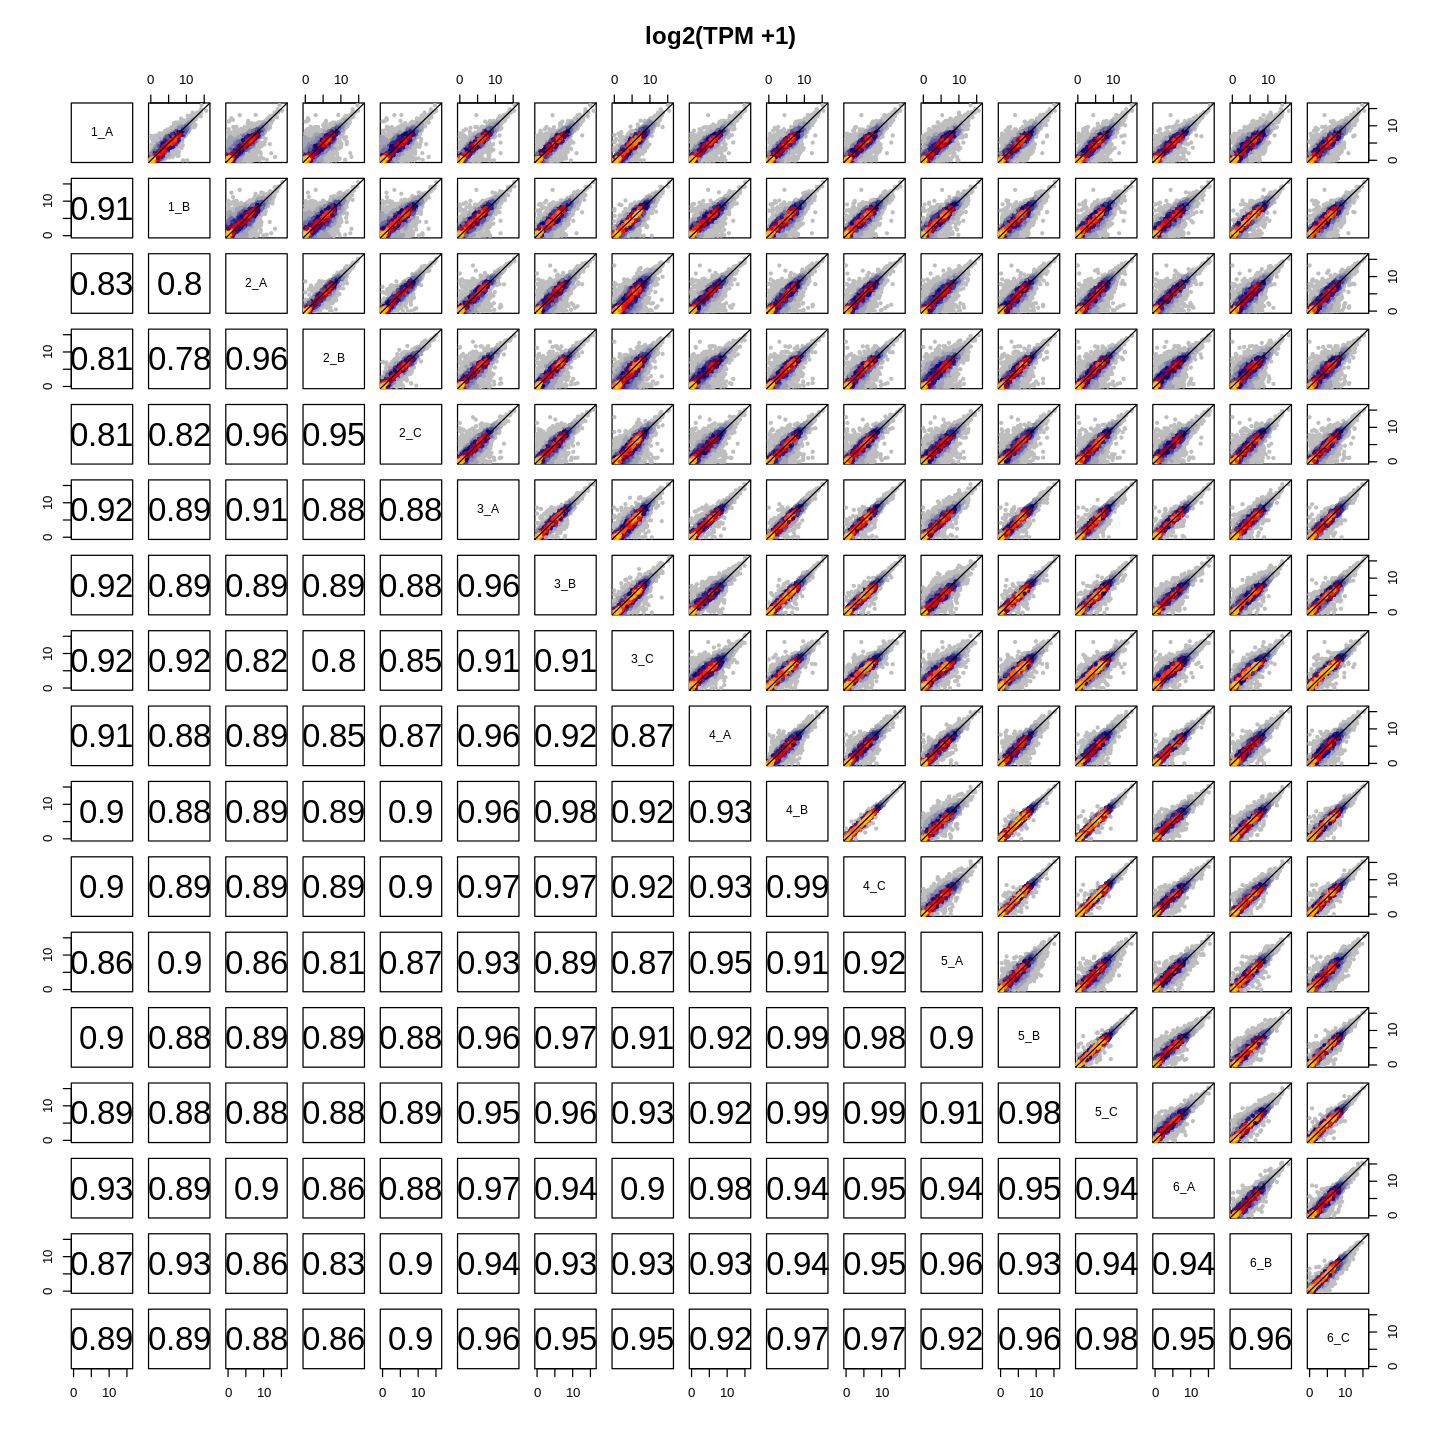

In [27]:
options(repr.plot.width = 12)
options(repr.plot.height = 12)
LSD::heatpairs(aggresults, main = "log2(TPM +1)")

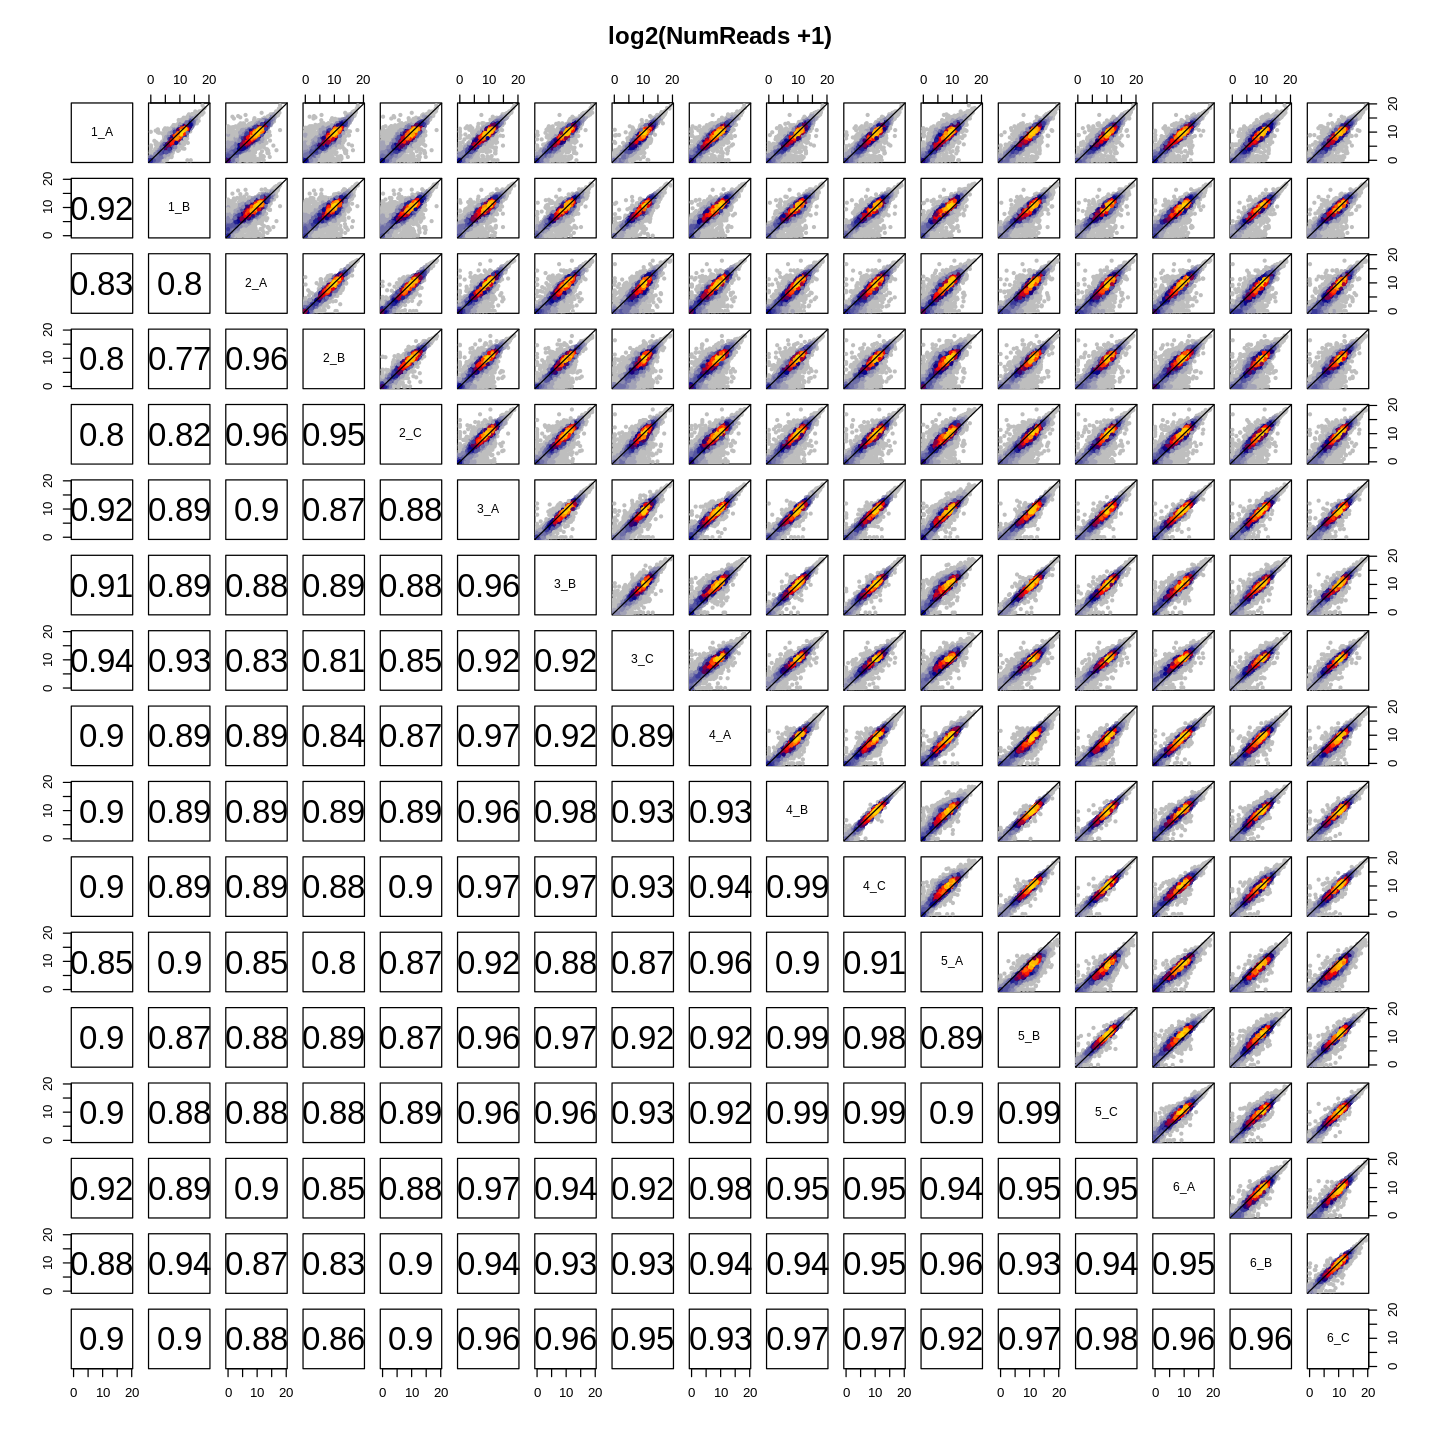

In [28]:
aggresults_counts = acast(results %>% filter(!grepl("^ERCC",Name)), formula = Name ~ sample + replicate, value.var = "NumReads", fun.aggregate = median) 
aggresults_counts = log2(aggresults_counts + 1)
#colnames(aggresults) = sample2ezname(colnames(aggresults))
options(repr.plot.width = 12)
options(repr.plot.height = 12)
LSD::heatpairs(aggresults_counts, main = "log2(NumReads +1)")

## Reproducibility: cluster of correlation coefficients

Replicates fail to cluster, expect for S_S and Y_Y strains. What's going on? You would expect that biological replicates are more similar to one another

In [30]:
aggcor = cor(aggresults_counts)

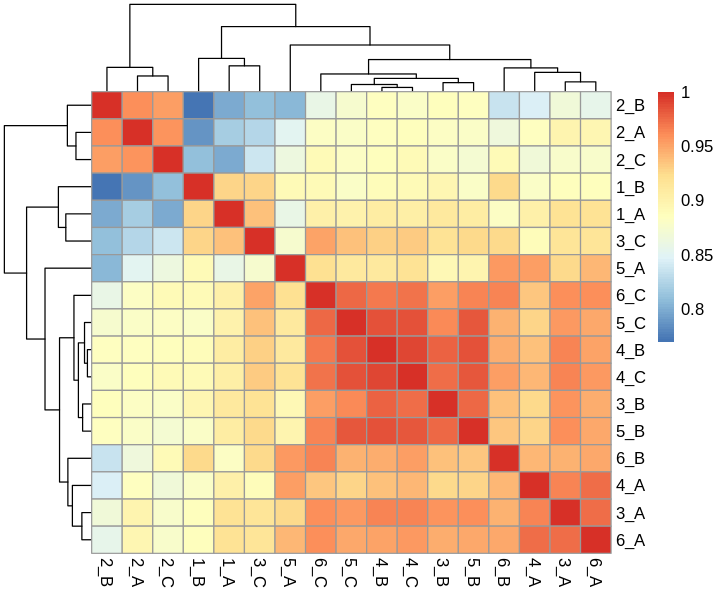

In [114]:
options(repr.plot.width=6, repr.plot.height=5)
pheatmap(aggcor)

## ERCC quantification

In [109]:
erccs = results %>% 
            filter(grepl("ERCC", Name))
ercc_ref_cnames = c(
    "id", "ercc_id","subgroup","conc.1","conc.2","fold.change","log2"
)
ercc_ref = read_delim("/g/steinmetz/project/IESY/genomes/ERCC/cms_095046.txt", delim="\t", col_names = ercc_ref_cnames)
ercc_combined = merge(erccs,ercc_ref,by.x ="Name", by.y="ercc_id")
ercc_combined$conc.1 = as.numeric(ercc_combined$conc.1)

Parsed with column specification:
cols(
  id = col_character(),
  ercc_id = col_character(),
  subgroup = col_character(),
  conc.1 = col_character(),
  conc.2 = col_character(),
  fold.change = col_character(),
  log2 = col_character()
)


Decent ERCC correlation across samples

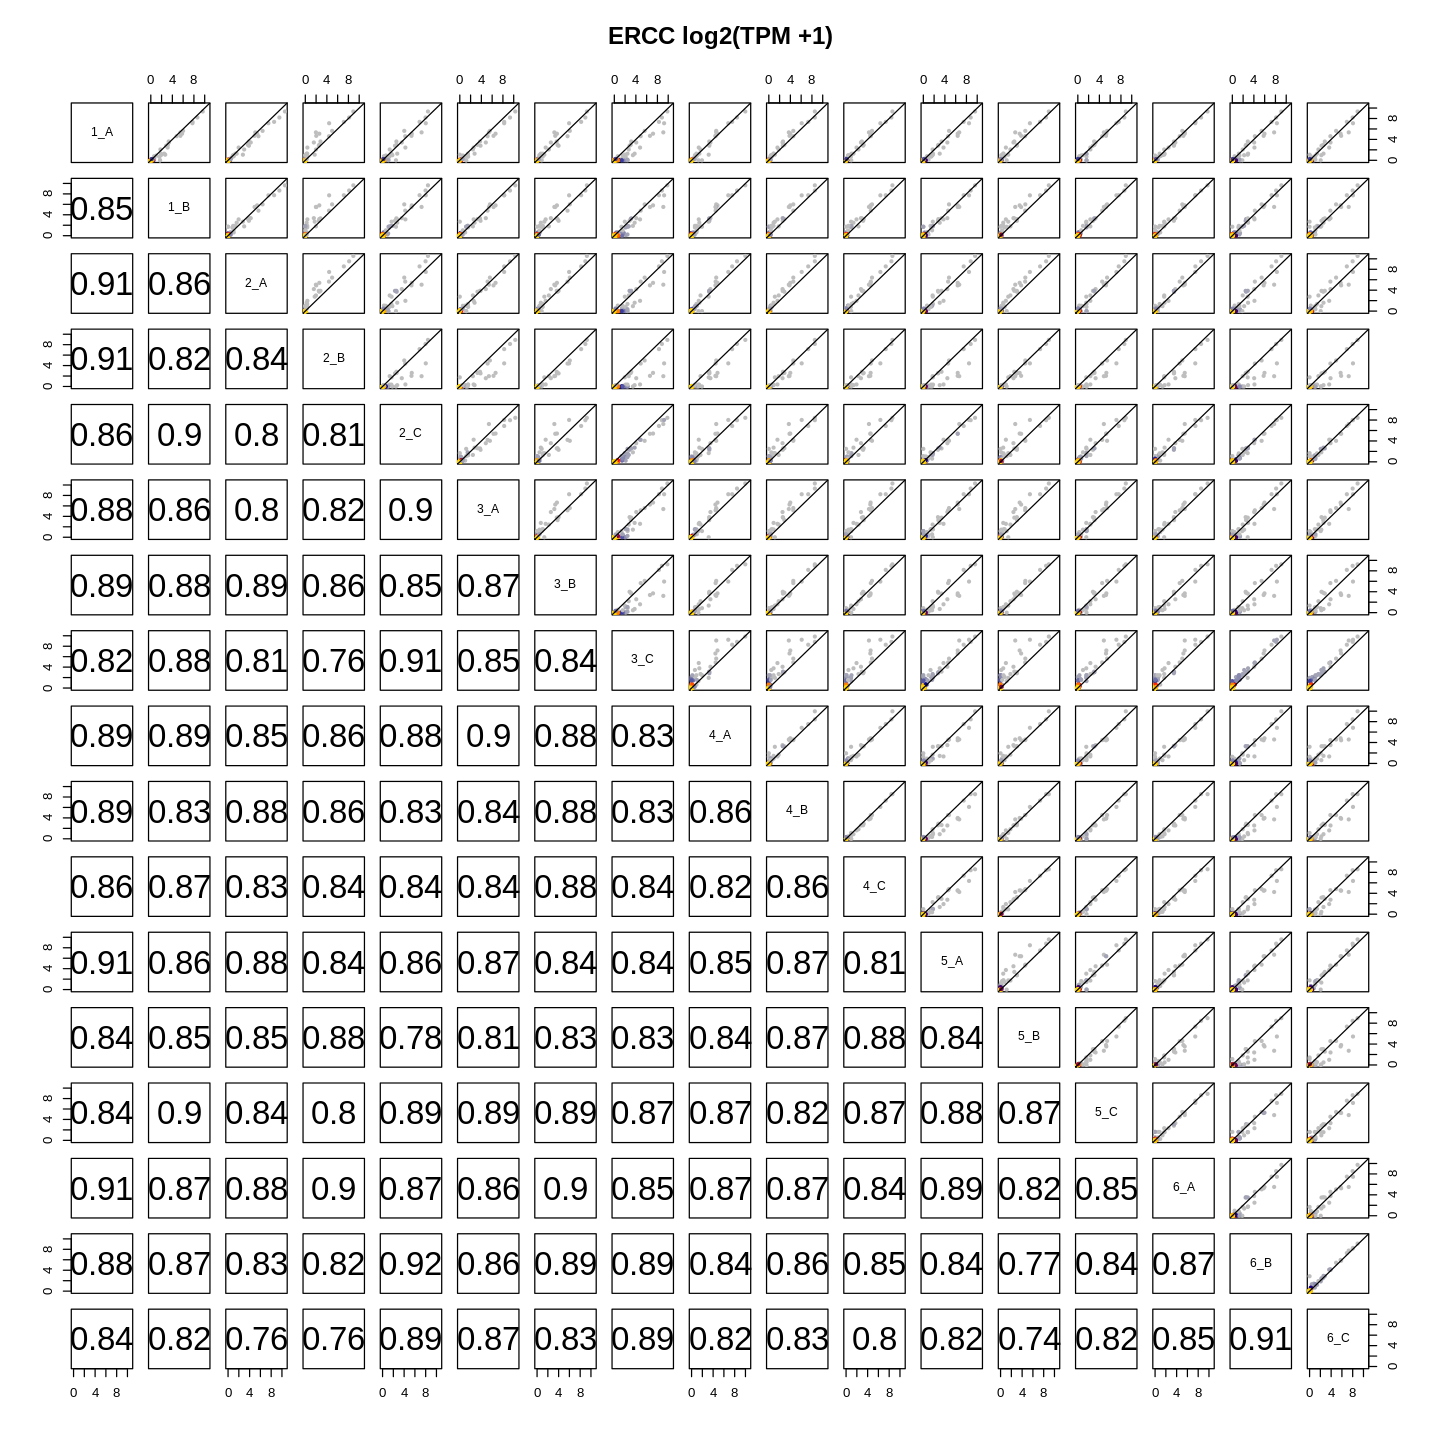

In [113]:
aggresults_ercc = acast(ercc_combined, formula = Name ~ sample + replicate, value.var = "TPM", fun.aggregate = median) 
aggresults_ercc = log2(aggresults_ercc + 1)
options(repr.plot.width = 12)
options(repr.plot.height = 12)
LSD::heatpairs(aggresults_ercc, main = "ERCC log2(TPM +1)")

Correlation between ERCC quantification and spike-in conc

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 982 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 982 rows containing non-finite values (stat_smooth).”

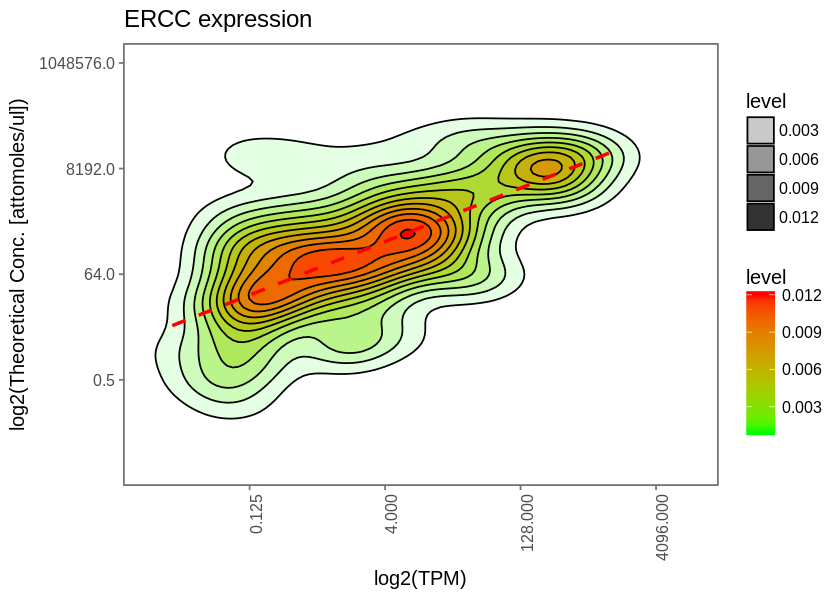

In [108]:
options(repr.plot.width=7, repr.plot.height=5)

lm_eqn <- function(df,x,y){
    m <- lm(y ~ x, df);
    eq <- substitute(italic(y) == a + b %.% italic(x)*","~~italic(r)^2~"="~r2, 
         list(a = format(coef(m)[1], digits = 2), 
              b = format(coef(m)[2], digits = 2), 
             r2 = format(summary(m)$r.squared, digits = 3)))
    as.character(as.expression(eq));                 
}


p <- ggplot(ercc_combined, aes(x=TPM,y=conc.1)) +
      
    theme_few() + 
    stat_density2d(aes(fill=..level..,alpha=..level..),geom='polygon',colour='black') + 
    scale_fill_continuous(low="green",high="red") +
    geom_smooth(method=lm,linetype=2,colour="red",se=F) + 
    #geom_point(aes(color=replicate)) +
    scale_y_continuous(trans="log2", limits = c(.01,1000000)) +
    scale_x_continuous(trans="log2", limits = c(.01,10000)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))  +
    xlab("log2(TPM)") + ylab("log2(Theoretical Conc. [attomoles/ul])") +
#     geom_text(x = 128, y = 16, label = lm_eqn(df,NumReads,conc.1), parse = TRUE) +
    ggtitle("ERCC expression")
     
p

## Expression of BUL2

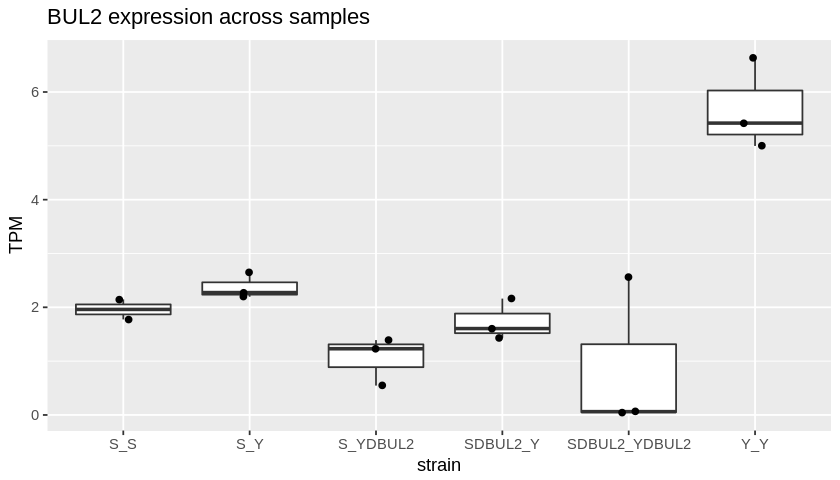

In [123]:
options(repr.plot.width=7, repr.plot.height=4)
p <- ggplot(results %>% filter(Name=="YML111W"),aes(x=strain,y=TPM)) +
     geom_boxplot() + geom_jitter(width = 0.1) + #+ geom_label() 
     ggtitle("BUL2 expression across samples")
p

Unclear why one 

## Example expression of S- and Y-specific gene

YKL068W (S-specific) is only expressed in S_S or S_Y strains. Likewise YKL068W_YJM789 (Y-specific) is only expressed in Y_Y or S_Y strains

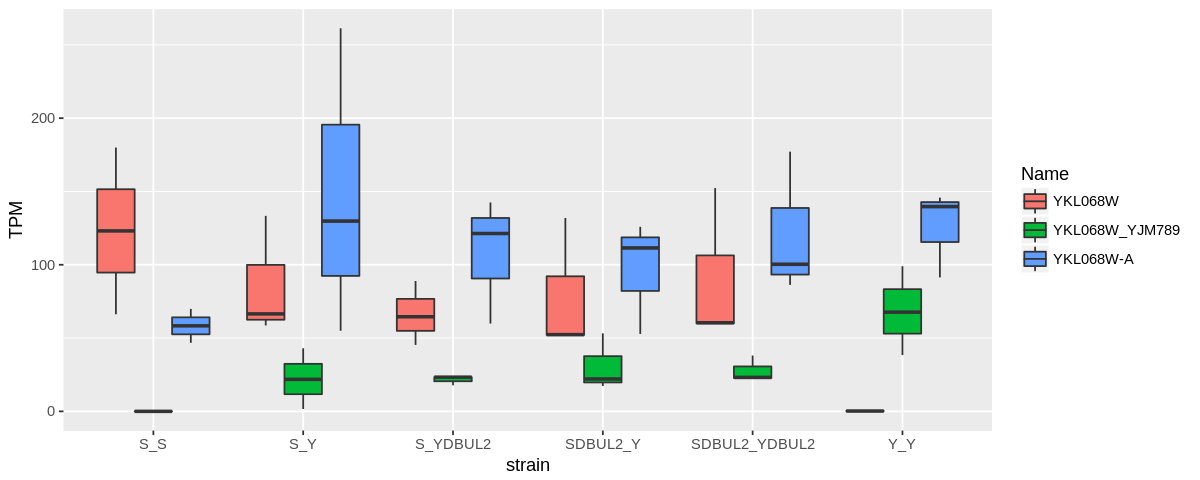

In [117]:
options(repr.plot.width=10, repr.plot.height=4)
p <- ggplot(results %>% filter(grepl("YKL068W", Name)) ,aes(x=strain,y=TPM,fill=Name)) +
     geom_boxplot() #+ geom_label()
p

# Differential expression testing

Only comparing S_YDBUL2 to SDBUL2_Y, otherwise effects are dominated by S_S / Y_Y differences and because SDBUL2_YDBUL2 has strange expression phenotype (idea from Paul = haploinsufficiency)

In [187]:
sr = file.path(RESULTS,"sleuth_results.rda")
rerun = T
if (!file.exists(sr) | rerun) {
    salmondirs <- file.path(RESULTS, c("Sample1A",
                                            "Sample1B",
                                            #"Sample1C",
                                            "Sample2A",
                                            "Sample2B",
                                            "Sample2C",
                                            "Sample3A",
                                            "Sample3B",
                                            "Sample3C",
                                            "Sample4A",
                                            "Sample4B",
                                            "Sample4C",
                                            "Sample5A",
                                            "Sample5B",
                                            "Sample5C",
                                            "Sample6A",
                                            "Sample6B",
                                            "Sample6C"
                                          ))
    if ( F ) {
        cat("Running sleuth\n\n")
        
        for (i in salmondirs) {
            if (file.exists(file.path(i,"abundance.h5"))) {
                file.remove(file.path(i,"abundance.h5"))
            }
        }

        prepare_fish_for_sleuth(salmondirs)
    }
    synT = data.frame(
        cbind(
            sample = c("1A","1B",
                      "2A","2B","2C",
                      "3A","3B","3C",
                      "4A","4B","4C",
                      "5A","5B","5C",
                      "6A","6B","6C"
                     ),
            strain = c("S_S", "S_S", 
                       "Y_Y", "Y_Y", "Y_Y",
                       "S_Y", "S_Y", "S_Y",
                       "SDBUL2_Y", "SDBUL2_Y", "SDBUL2_Y",
                       'S_YDBUL2', 'S_YDBUL2', 'S_YDBUL2',
                       'SDBUL2_YDBUL2', 'SDBUL2_YDBUL2', 'SDBUL2_YDBUL2'
                      ),
            genome = c("SS","SS",
                       "YY","YY","YY",
                       "SY","SY","SY",
                       "SY","SY","SY",
                       "SY","SY","SY",
                       "SY","SY","SY"
                      ),
            ybul = c(F,F,
                     T,T,T,
                     T,T,T,
                     T,T,T,
                     F,F,F,
                     F,F,F),
            sbul = c(T,T,
                     F,F,F,
                     T,T,T,
                     F,F,F,
                     T,T,T,
                     F,F,F),
            batch = c(1,1,
                     1,1,2,
                     1,1,2,
                     1,2,2,
                     1,2,2,
                     1,2,2),
            path = salmondirs
        ),
        stringsAsFactors = F
    )
    # full
    synT = synT %>% filter(sample %in% c("1A","1B",
                                         "2A","2B","2C",
                                         "3A","3B","3C",
                                         "4A","4B","4C",
                                         "5A","5B","5C",
                                         "6A","6B","6C"))
    so <- sleuth_prep(synT, ~ strain + batch)
    #so <- sleuth_prep(synT, ~ (sbul * genome) + batch)
    so <- sleuth_fit(so)
    so <- sleuth_fit(so, ~ batch, 'reduced')
    so_full <- sleuth_lrt(so, 'reduced', 'full')
    results_table_full <- sleuth_results(so_full, 'reduced:full', test_type = 'lrt')
    # select samples to compare
    synT = synT %>% filter(sample %in% c(#"1A","1B",
                                         #"2A","2B","2C",
                                         #"3A","3B","3C",
                                         "4A","4B","4C",
                                         "5A","5B","5C"))
                                         #"6A","6B","6C"))
    so <- sleuth_prep(synT, ~ strain + batch)
    #so <- sleuth_prep(synT, ~ (sbul * genome) + batch)
    so <- sleuth_fit(so)
    so <- sleuth_fit(so, ~ batch, 'reduced')
    so <- sleuth_lrt(so, 'reduced', 'full')
    results_table <- sleuth_results(so, 'reduced:full', test_type = 'lrt')
    save(so, results_table, file = sr)
    
} else {
    load(sr)
}

reading in kallisto results
dropping unused factor levels
.................
normalizing est_counts
5960 targets passed the filter
normalizing tpm
merging in metadata
summarizing bootstraps

fitting measurement error models
shrinkage estimation
computing variance of betas
fitting measurement error models
shrinkage estimation
computing variance of betas
reading in kallisto results
dropping unused factor levels
......
normalizing est_counts
5969 targets passed the filter
normalizing tpm
merging in metadata
summarizing bootstraps

fitting measurement error models
shrinkage estimation
computing variance of betas
fitting measurement error models
shrinkage estimation
computing variance of betas


# PCA analysis for systematic variation

Do not observe grouping of replicates as one would normally expected from PCA. Indicative of different systematic variation or some strong confounder? This could also indicate that all of the samples are highly similar without sources of systematic variation...

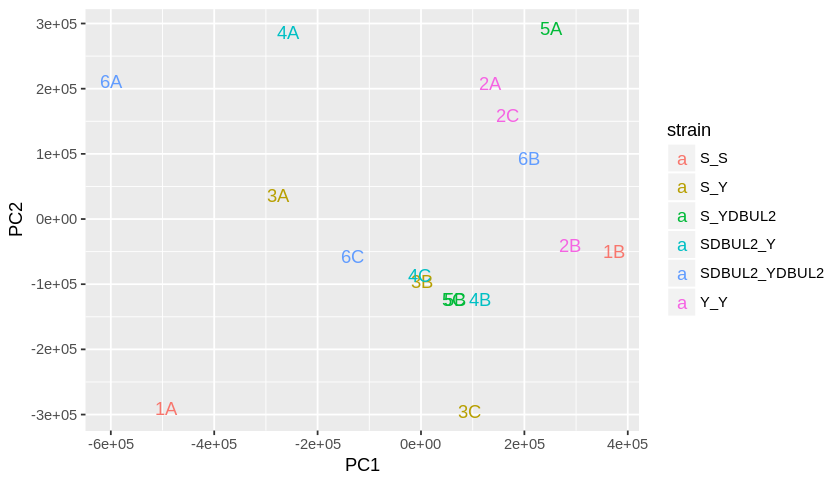

In [130]:
options(repr.plot.width=7, repr.plot.height=4)
plot_pca(so_full, color_by="strain",text_labels = T,use_filtered = T,units = "est_counts")

# MDS 

Suggests that batch effect could be driving differences...

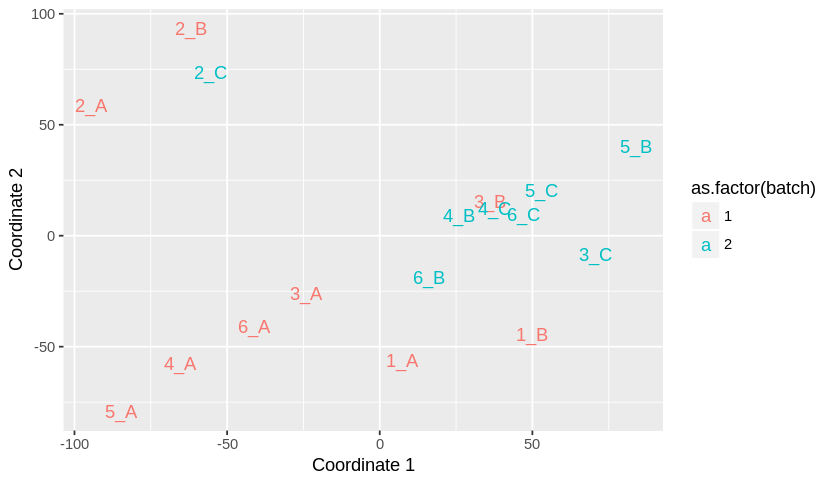

In [166]:
# Classical MDS
# N rows (objects) x p columns (variables)
# each row identified by a unique row name

mydata <- t(aggresults_counts)
d <- dist(mydata) # euclidean distances between the rows
fit <- cmdscale(d,eig=TRUE, k=2) # k is the number of dim
#fit # view results

# # plot solution 
mds_df = data.frame(
    x = fit$points[,1], 
    y = fit$points[,2], 
    sample = row.names(mydata),
    strain = c("S_S", "S_S", 
                       "Y_Y", "Y_Y", "Y_Y",
                       "S_Y", "S_Y", "S_Y",
                       "SDBUL2_Y", "SDBUL2_Y", "SDBUL2_Y",
                       'S_YDBUL2', 'S_YDBUL2', 'S_YDBUL2',
                       'SDBUL2_YDBUL2', 'SDBUL2_YDBUL2', 'SDBUL2_YDBUL2'
                      ),
    genome = c("SS","SS",
               "YY","YY","YY",
               "SY","SY","SY",
               "SY","SY","SY",
               "SY","SY","SY",
               "SY","SY","SY"
              ),
    ybul = c(F,F,
             T,T,T,
             T,T,T,
             T,T,T,
             F,F,F,
             F,F,F),
    sbul = c(T,T,
             F,F,F,
             T,T,T,
             F,F,F,
             T,T,T,
             F,F,F),
    batch = c(1,1,
             1,1,2,
             1,1,2,
             1,2,2,
             1,2,2,
             1,2,2)
)
p <- ggplot(mds_df,aes(x=x,y=y, label = sample, color = as.factor(batch))) + 
    geom_text() + xlab("Coordinate 1") + ylab("Coordinate 2")
p

# Sig differentially expressed genes

Comparision of S∆Bul2_xYJM789 and S_xYJM789∆Bul2

How many?

In [168]:
sum(results_table[["qval"]]<0.05,na.rm = T)

[1] 9

In [128]:
results_table %>% filter(qval < 0.05)

target_id,test_stat,pval,qval,rss,sigma_sq,tech_var,mean_obs,var_obs,sigma_sq_pmax,smooth_sigma_sq,final_sigma_sq,degrees_free
YER081W(+),21.43726,3.655975e-06,0.01090394,3.6058590,0.8988390,2.625725e-03,6.402218,0.7218208,0.8988390,0.02727506,0.8988390,1
YOL058W(+),22.49612,2.105683e-06,0.01090394,2.0042251,0.5009884,6.787627e-05,9.832826,0.5740708,0.5009884,0.02208711,0.5009884,1
YPL244C(-),20.60447,5.646416e-06,0.01122696,9.8346761,2.3803602,7.830882e-02,5.266706,2.7537656,2.3803602,0.03860205,2.3803602,1
YFR015C(-),19.45210,1.031542e-05,0.01230630,1.3625659,0.3397590,8.825060e-04,7.279374,0.3404562,0.3397590,0.02063414,0.3397590,1
YGL117W(+),19.87725,8.257724e-06,0.01230630,1.2502364,0.3119818,5.772500e-04,7.487675,0.3811028,0.3119818,0.01954541,0.3119818,1
YML054C(-),18.19453,1.994510e-05,0.01982876,2.3581506,0.5758089,1.372871e-02,6.222015,2.5432659,0.5758089,0.02894778,0.5758089,1
YGL256W(+),17.43974,2.965600e-05,0.02527115,3.2407232,0.8101469,3.391967e-05,10.603875,0.6503141,0.8101469,0.02649017,0.8101469,1
YGR079W(+),16.40999,5.101560e-05,0.03803851,0.9183935,0.2295252,7.314628e-05,9.818135,0.1843365,0.2295252,0.02202142,0.2295252,1
YOR303W(+),15.74887,7.233130e-05,0.04793958,0.4775615,0.1192548,1.355714e-04,9.008914,0.3141838,0.1192548,0.01926306,0.1192548,1


## Expression difference for diferentially expressed genes, all strains

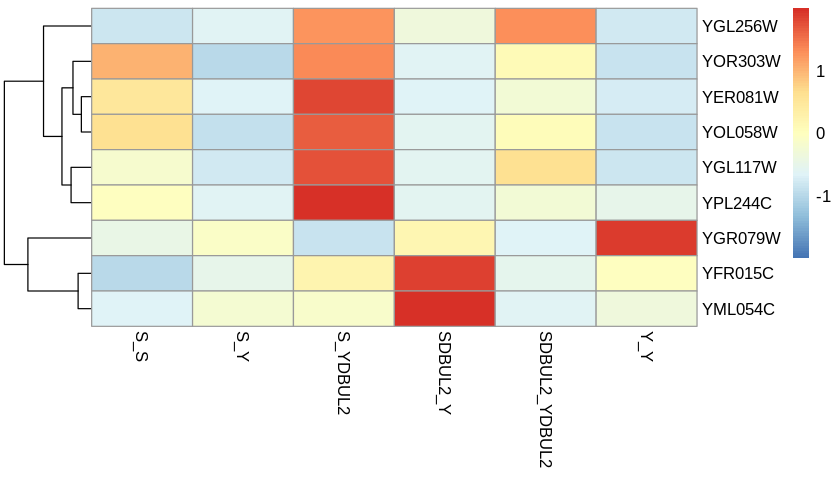

In [169]:
e_genes = results_table %>% mutate(target_id = substr(target_id,1,nchar(target_id)-3)) %>% 
    filter(qval <=0.05) %>% select(target_id)
e_genes_tpm = acast(results %>% filter(Name %in% unlist(e_genes)),
            formula = Name ~ strain, value.var = "TPM", fun.aggregate = median)
options(repr.plot.width=7, repr.plot.height=4)
pheatmap(e_genes_tpm+0.5, scale = "row", cluster_cols = F)

## Do these 9 sig diff expressed genes have chrXIII eQTL?

In [170]:
eQTLs_f = "/g/steinmetz/brooks/genphen/transcriptome/qtl/eQTL_08032016.rda"
load(eQTLs_f)

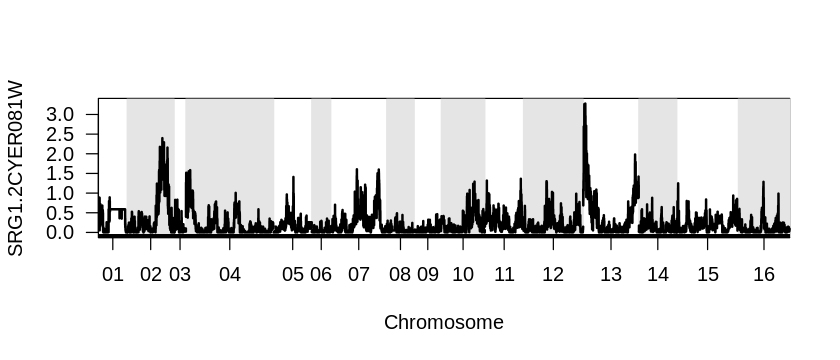

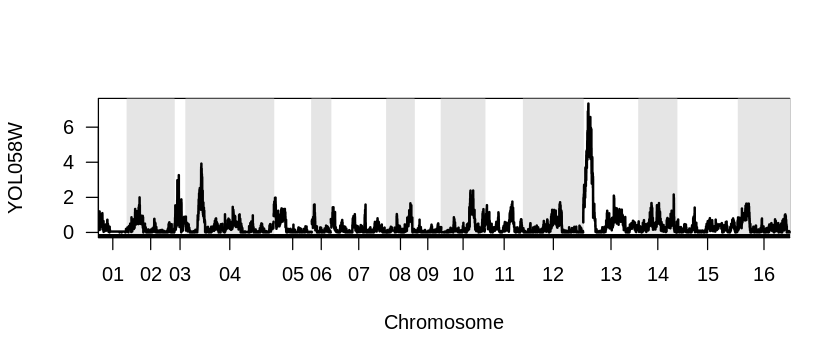

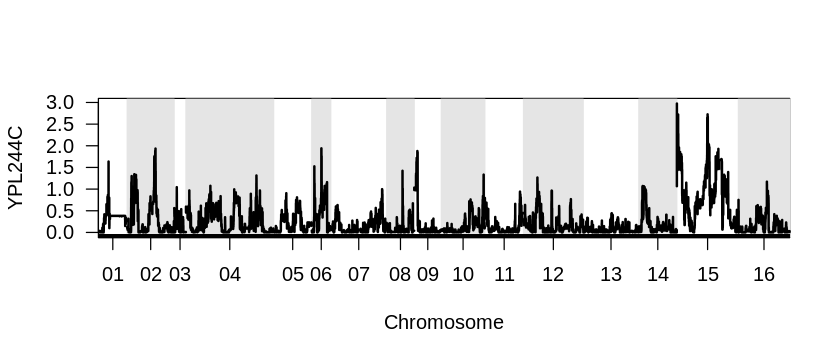

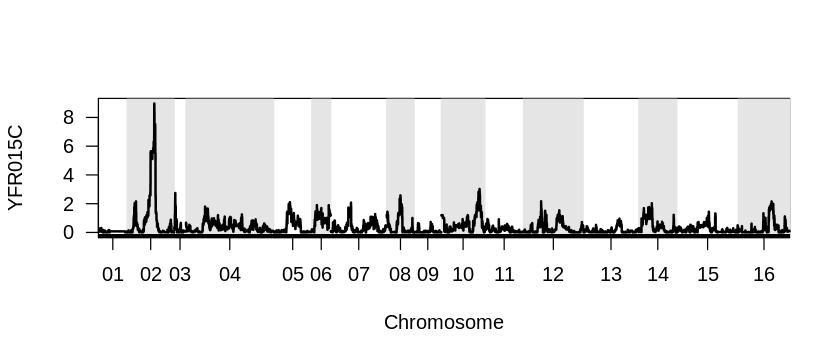

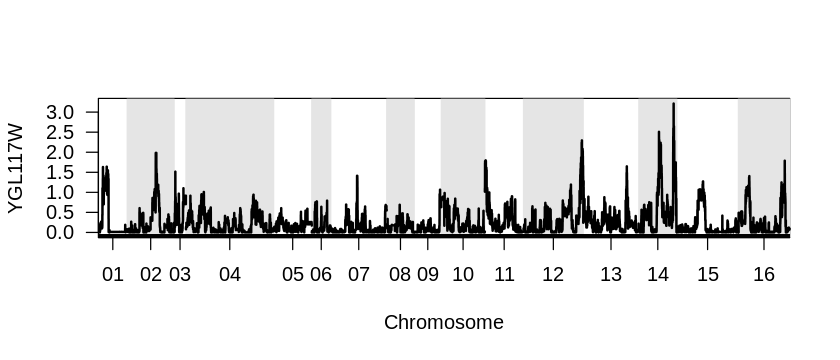

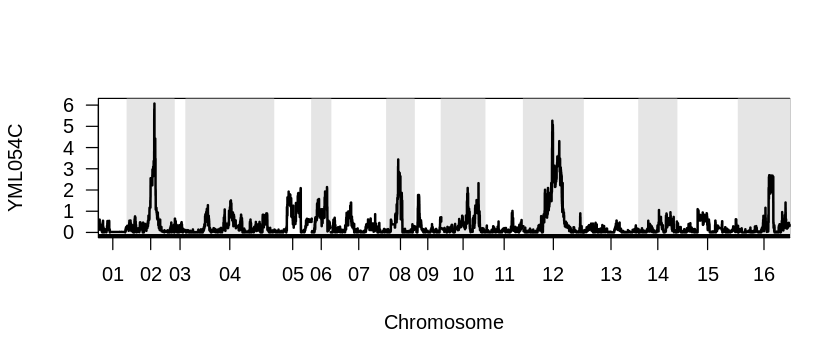

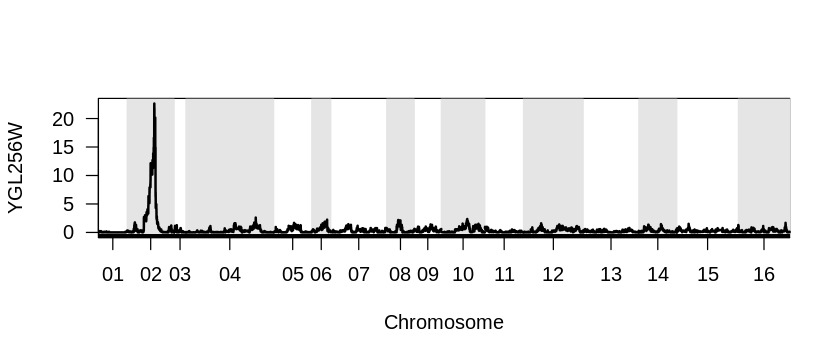

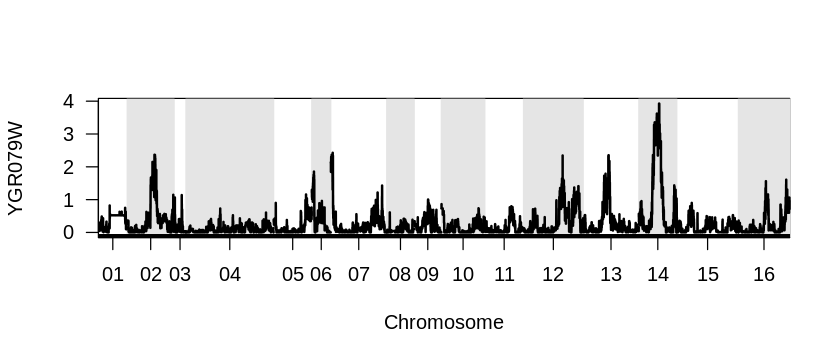

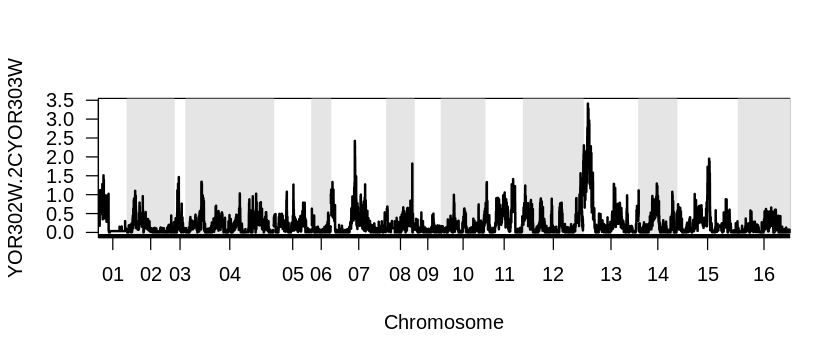

In [171]:
options(repr.plot.width=7, repr.plot.height=3)
for (i in unlist(e_genes)) {
    plot(eQTL$qtls,lodcolumn = grep(i,colnames(eQTL$qtls))-2, bandcol="gray90")
}

# Explicit overlap of sig eQTL with mQTL

In [172]:
mQTLs_f = "/g/steinmetz/brooks/genphen/metabolome/qtls/mQTLs_table.rda"
load(mQTLs_f)

In [173]:
qtls_norm

metabolite,seqnames,start,end,width,strand
AKG,chrXIII,24134,169765,145632,*
ASP,chrIV,570106,1517334,947229,*
GLN,chrVII,199690,291925,92236,*
GLY,chrXIII,24997,150534,125538,*
HSE,chrXIII,24474,114648,90175,*
LEU,chrXIII,43096,168686,125591,*
MET,chrXIII,77482,146198,68717,*
PHE,chrXV,982135,1020567,38433,*
PYR,chrXIII,45947,168229,122283,*
TRP,chrXIII,869798,917493,47696,*


In [177]:
bul2_s = 46942-40000
bul2_e = 49704+40000
bul2_eqtl = eQTL_table %>% filter(seqnames=="chrXIII",
                     ((start < bul2_s) & (end > bul2_e)) |
                     ((start < bul2_s) & (end > bul2_s)) |
                     ((start < bul2_e) & (end > bul2_e)),
                     !grepl("YML", gene))

In [183]:
bul2_eqtl %>% filter(gene %in% unlist(e_genes))

gene,seqnames,start,end,width,strand,maxlod,maxmrk
YOL058W,chrXIII,87655,142704,55050,*,7.345598,mrk_37409


Only a single hit. I have been doing additional resampling to see if any of the lower effect chrXIII peaks above are significant. 

## Expression of genes with chrXIII (BUL2?) trans-eQTL

Signficance of differential expression S∆Bul2_xYJM789 and S_xYJM789∆Bul2

In [185]:
results_table %>% filter(grepl(paste(bul2_eqtl[["gene"]],collapse="|"), target_id)) %>%
    filter(!grepl("^YM", target_id))

target_id,test_stat,pval,qval,rss,sigma_sq,tech_var,mean_obs,var_obs,sigma_sq_pmax,smooth_sigma_sq,final_sigma_sq,degrees_free
YOL058W(+),22.49612175,2.105683e-06,0.01090394,2.00422508,0.500988394,6.787627e-05,9.832826,0.57407085,0.500988394,0.02208711,0.50098839,1
YOR375C(-),4.11461893,4.251410e-02,0.59375505,0.53176222,0.132658856,2.816985e-04,8.936045,0.45067729,0.132658856,0.01908981,0.13265886,1
YPL111W(+),3.64271040,5.631519e-02,0.63924807,0.13768921,0.032866550,1.555753e-03,6.614879,0.04237791,0.032866550,0.02545884,0.03286655,1
YHR128W(+),3.50001244,6.136837e-02,0.64904666,0.11507969,0.028678761,9.116019e-05,9.385168,0.13958902,0.028678761,0.02034609,0.02867876,1
YDR502C(-),2.37531532,1.232667e-01,0.69906620,1.48874415,0.369329509,2.856530e-03,6.411642,0.41888265,0.369329509,0.02719286,0.36932951,1
YPR016C(-),2.49653871,1.140968e-01,0.69906620,0.09215152,0.021272073,1.765808e-03,6.572889,0.02504337,0.021272073,0.02582654,0.02582654,1
YGR197C(-),2.18998319,1.389108e-01,0.70008735,0.13264973,0.022541746,1.062069e-02,4.727194,0.02663339,0.022541746,0.04418823,0.04418823,1
YJR040W(+),2.15434576,1.421670e-01,0.70008735,0.03455273,0.008302124,3.360577e-04,8.255578,0.05537701,0.008302124,0.01802229,0.01802229,1
YDR348C(-),1.32542599,2.496206e-01,0.70438266,1.62506376,0.388522187,1.774375e-02,4.926386,0.35742733,0.388522187,0.04223409,0.38852219,1
YNL077W(+),1.51283921,2.187064e-01,0.70438266,0.09348596,0.020358992,3.012498e-03,5.910772,0.02332415,0.020358992,0.03202112,0.03202112,1


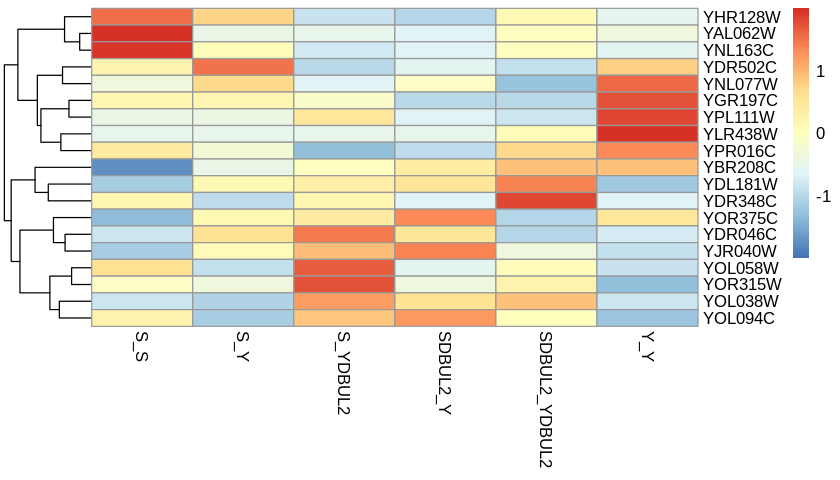

In [186]:
mqtl_genes = results_table %>% filter(grepl(paste(bul2_eqtl[["gene"]],collapse="|"), target_id)) %>% 
    filter(!grepl("^YM", target_id)) %>%
    mutate(target_id = substr(target_id,1,nchar(target_id)-3)) %>% select(target_id)
mqtl_genes_tpm = acast(results %>% filter(Name %in% unlist(mqtl_genes)),
            formula = Name ~ strain, value.var = "TPM", fun.aggregate = median)
options(repr.plot.width=7, repr.plot.height=4)
pheatmap(mqtl_genes_tpm+0.5, scale = "row", cluster_cols = F)